In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score

In [ ]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/98bd30e353cb034ff3274cc32db3d900/asset-v1:ITMOUniversity+bonus_track_3+spring_2023+type@asset+block/360T.csv')

In [ ]:
df.describe()

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min,class
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,...,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,35357.277397,2259.418664,28316.568065,1809.434932,220.380565,1971.047089,43.384846,218.404966,2024.068921,34.692209,...,612.672945,1591.651969,102.797089,2.305651,233.622003,42.994863,0.819225,1.006849,0.570205,0.963613
std,8029.814256,199.932501,6429.777605,160.455970,16.695954,537.507421,7.394107,16.634178,538.273105,3.465443,...,83.771184,537.416088,30.474561,6.635243,438.116534,7.406980,0.316500,0.092295,0.495153,0.187291
min,30128.000000,2008.000000,24270.000000,1618.000000,200.000000,1535.000000,19.000000,195.000000,1551.000000,17.000000,...,507.000000,1158.000000,0.000000,0.000000,75.000000,19.000000,0.110000,1.000000,0.000000,0.000000
25%,32420.750000,2161.000000,26044.000000,1736.000000,211.000000,1667.000000,43.000000,211.000000,1716.000000,33.000000,...,574.000000,1289.000000,101.000000,1.000000,80.000000,42.000000,0.830000,1.000000,0.000000,1.000000
50%,33002.500000,2200.000000,26395.500000,1759.000000,215.000000,1721.000000,46.000000,213.000000,1780.000000,35.000000,...,586.000000,1342.000000,109.000000,1.000000,83.000000,46.000000,1.000000,1.000000,1.000000,1.000000
75%,34757.250000,2317.000000,27862.000000,1857.000000,222.000000,1848.000000,48.000000,223.000000,1934.500000,37.000000,...,634.000000,1470.000000,117.000000,2.000000,88.000000,47.000000,1.000000,1.000000,1.000000,1.000000
max,76327.000000,3469.000000,64160.000000,2916.000000,270.000000,3495.000000,53.000000,364.000000,4058.000000,44.000000,...,900.000000,3021.000000,148.000000,89.000000,1842.000000,52.000000,1.060000,3.000000,1.000000,1.000000


In [ ]:
random_state = 65

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'],
                                                    random_state=random_state,
                                                    test_size=0.3,
                                                    stratify=df['class'])

In [ ]:
cols = X_train.columns
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [ ]:
clf = MLPClassifier(random_state=random_state, hidden_layer_sizes = (31, 10), activation = 'logistic', max_iter = 1000)

In [ ]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)

In [ ]:
conf_matrix

array([[ 14,  12],
       [  8, 667]])

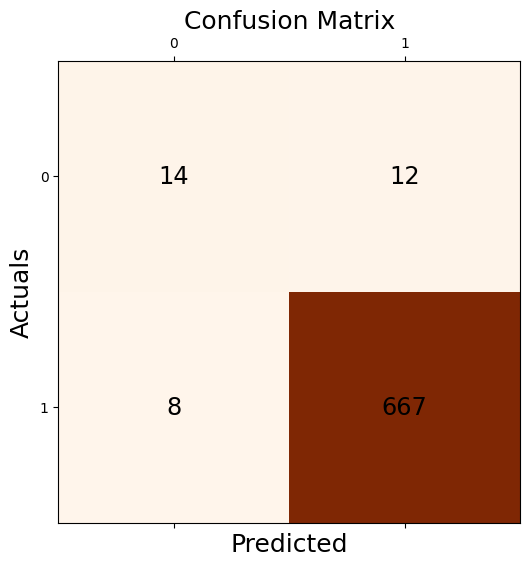

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
      ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
precision_score(y_test, predictions, average='macro')

0.8093452938813763

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test, predictions, digits=3)
report

'              precision    recall  f1-score   support\n\n           0      0.636     0.538     0.583        26\n           1      0.982     0.988     0.985       675\n\n    accuracy                          0.971       701\n   macro avg      0.809     0.763     0.784       701\nweighted avg      0.969     0.971     0.970       701\n'

In [ ]:
#               precision    recall  f1-score   support

#            0      0.636     0.538     0.583        26
#            1      0.982     0.988     0.985       675

#     accuracy                          0.971       701
#    macro avg      0.809     0.763     0.784       701
# weighted avg      0.969     0.971     0.970       701



In [ ]:
item1 = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/ab75da6cdf6315f16705cd0e43f69aac/asset-v1:ITMOUniversity+bonus_track_3+spring_2023+type@asset+block/DL_Task_2_test_file_44.csv')

In [ ]:
item2 = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/ba0102632b05adaa70d5db089215d314/asset-v1:ITMOUniversity+bonus_track_3+spring_2023+type@asset+block/DL_Task_2_test_file_78.csv')

In [ ]:
item3 = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/92947739c0fb4c8303ff207d82664e82/asset-v1:ITMOUniversity+bonus_track_3+spring_2023+type@asset+block/DL_Task_2_test_file_107.csv')

In [ ]:
item4 = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/e3790f31e3db983570a8ab3319c94e50/asset-v1:ITMOUniversity+bonus_track_3+spring_2023+type@asset+block/DL_Task_2_test_file_166.csv')

In [ ]:
data = pd.concat([item1, item2, item3, item4]).reset_index(drop=True)

In [ ]:
data[cols] = scaler.transform(data[cols])

In [ ]:
data

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min
0,-0.333006,-0.406619,-0.295565,-0.302102,-0.435980,-0.434585,0.645334,-0.328240,-0.400329,-0.197209,...,-0.332101,-0.388436,-0.428204,0.229345,-0.345642,-0.351297,0.699598,0.587125,-0.082301,0.869584
1,-0.336131,-0.416659,-0.328712,-0.396196,-0.495696,-0.423291,0.107761,-0.388977,-0.404099,0.945173,...,-0.356867,-0.436102,-0.418795,-0.072031,-0.345642,-0.339937,0.163464,0.587125,-0.082301,0.869584
2,-0.544522,-0.973898,-0.511644,-0.885483,-0.913706,-0.707523,-2.042531,-0.935610,-0.724588,0.088386,...,-0.457724,-0.662517,-0.706710,0.463750,0.100040,-0.346753,-1.981075,-2.142383,-0.082301,-1.149975
3,-0.483392,-0.808233,-0.493194,-0.835300,-0.853991,-0.690582,-2.714497,-0.874873,-0.760407,-0.768401,...,-0.418602,-0.579101,-0.686010,0.932558,-0.197081,-0.355841,-2.651243,-1.956280,-0.082301,-1.149975


In [ ]:
predictions = clf.predict(data)

In [ ]:
predictions

array([0, 0, 1, 1])

# Опросы

In [ ]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import precision_score
import tensorflow as tf

In [ ]:
tf.random.set_seed(2)
k = tf.constant(tf.random.normal([2,2,2], stddev=1, mean=0))
k[0][1][1]

<tf.Tensor: shape=(), dtype=float32, numpy=-1.0405852>

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names, comment='\t', na_values='?',
                          sep=' ', skipinitialspace=True, )
raw_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
dataset = raw_dataset.dropna().drop(['Origin'], axis=1)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = dataset.drop(['MPG'], axis=1)
y = dataset['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
260,6,225.0,110.0,3620.0,18.7,78
184,4,140.0,92.0,2572.0,14.9,76
174,6,171.0,97.0,2984.0,14.5,75
64,8,318.0,150.0,4135.0,13.5,72
344,4,86.0,64.0,1875.0,16.4,81
...,...,...,...,...,...,...
72,8,304.0,150.0,3892.0,12.5,72
107,6,232.0,100.0,2789.0,15.0,73
272,4,151.0,85.0,2855.0,17.6,78
352,4,98.0,65.0,2380.0,20.7,81


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = tf.constant(scaler.fit_transform(X_train), dtype=tf.float32) 
X_test_scaled = tf.constant(scaler.transform(X_test), dtype=tf.float32) 
y_train = tf.constant(y_train, dtype=tf.float32, shape=(len(X_train), 1))
y_test = tf.constant(y_test, dtype=tf.float32)

In [ ]:
#Будем использовать полносвязную сеть с тремя скрытыми слоями. Определим количество нейронов в каждом слое.

num_input = 6  # количество входных нейронов — 6 признаков
num_hidden1 = 64  # количество нейронов первого скрытого слоя
num_hidden2 = 64  # количество нейронов второго скрытого слоя
num_hidden3 = 64 # количество нейронов третьего скрытого слоя
num_output = 1  # количество выходов. Для регрессии это 1 выход

In [ ]:
def regression_auto(x):
    # создаем первый скрытый слой со своими весами и сдвигами, используем ReLU в качестве функции активации
    hidden_layer1 = tf.add(tf.matmul(x, weights['w_h1']), biases['b_h1'])
    hidden_layer1 = tf.nn.relu(hidden_layer1)
    # создаем второй скрытый слой со своими весами и сдвигами, используем ReLU в качестве функции активации
    hidden_layer2 = tf.add(tf.matmul(hidden_layer1, weights['w_h2']), biases['b_h2'])
    hidden_layer2 = tf.nn.relu(hidden_layer2)
    # создаем третий скрытый слой со своими весами и сдвигами, используем ReLU в качестве функции активации
    hidden_layer3 = tf.add(tf.matmul(hidden_layer2, weights['w_h3']), biases['b_h3'])
    hidden_layer3 = tf.nn.relu(hidden_layer3)
    # создаем последний слой. Так как мы решаем задачу регрессии, то функция активации — линейная
    out_layer = tf.add(tf.matmul(hidden_layer3, weights['w_out']), biases['b_out'])
    return out_layer

In [ ]:
# случайным образом инициализируем веса и сдвиги соответствующих размеров
weights = {
    'w_h1': tf.Variable(tf.random.uniform([num_input, num_hidden1])),
    'w_h2': tf.Variable(tf.random.uniform([num_hidden1, num_hidden2])),
    'w_h3': tf.Variable(tf.random.uniform([num_hidden2, num_hidden3])),
    'w_out': tf.Variable(tf.random.uniform([num_hidden3, num_output]))
}
biases = {
    'b_h1': tf.Variable(tf.random.uniform([num_hidden1])),
    'b_h2': tf.Variable(tf.random.uniform([num_hidden2])),
    'b_h3': tf.Variable(tf.random.uniform([num_hidden3])),
    'b_out': tf.Variable(tf.random.uniform([num_output]))
}

In [ ]:
#Теперь зададим проход вперед по подаваемому набору данных.

def forward_pass(x):
    return regression_auto(x)

In [ ]:
def loss():
    return tf.reduce_mean(tf.abs(y_batch - forward_pass(X_batch)))

In [ ]:
#В качестве оптимизатора будем использовать Adam

optimizer = tf.optimizers.Adam(0.01, clipnorm=1)

In [ ]:
#Теперь можем приступить непосредственно к обучению. Обучаться будем не батчами, а на всем тренировочном наборе данных сразу.

# Количество эпох
epochs = 100
# Как часто показывать лосс во время обучения
display_step = 5

history = []

for ep in range(epochs):
    X_batch = X_train_scaled
    y_batch = y_train
    optimizer.minimize(loss, var_list=([values for key, values in weights.items()] + [values for key, values in biases.items()]))
    history.append(np.array([ep, loss().numpy()]))
    if ep % display_step == 0:
      print('Epoch: ' + str(ep + 1) + ' Loss: ' + str(loss()))

Epoch: 1 Loss: tf.Tensor(34356.348, shape=(), dtype=float32)
Epoch: 6 Loss: tf.Tensor(22705.69, shape=(), dtype=float32)
Epoch: 11 Loss: tf.Tensor(14351.923, shape=(), dtype=float32)
Epoch: 16 Loss: tf.Tensor(8550.287, shape=(), dtype=float32)
Epoch: 21 Loss: tf.Tensor(4685.255, shape=(), dtype=float32)
Epoch: 26 Loss: tf.Tensor(2249.9114, shape=(), dtype=float32)
Epoch: 31 Loss: tf.Tensor(829.7738, shape=(), dtype=float32)
Epoch: 36 Loss: tf.Tensor(104.581566, shape=(), dtype=float32)
Epoch: 41 Loss: tf.Tensor(143.61966, shape=(), dtype=float32)
Epoch: 46 Loss: tf.Tensor(92.67416, shape=(), dtype=float32)
Epoch: 51 Loss: tf.Tensor(23.395767, shape=(), dtype=float32)
Epoch: 56 Loss: tf.Tensor(11.568242, shape=(), dtype=float32)
Epoch: 61 Loss: tf.Tensor(4.001278, shape=(), dtype=float32)
Epoch: 66 Loss: tf.Tensor(4.4174185, shape=(), dtype=float32)
Epoch: 71 Loss: tf.Tensor(2.545459, shape=(), dtype=float32)
Epoch: 76 Loss: tf.Tensor(2.9760501, shape=(), dtype=float32)
Epoch: 81 Loss: 

In [ ]:
#Оценим модель на тестовых данных

results = forward_pass(X_test_scaled)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, results)

2.5980978

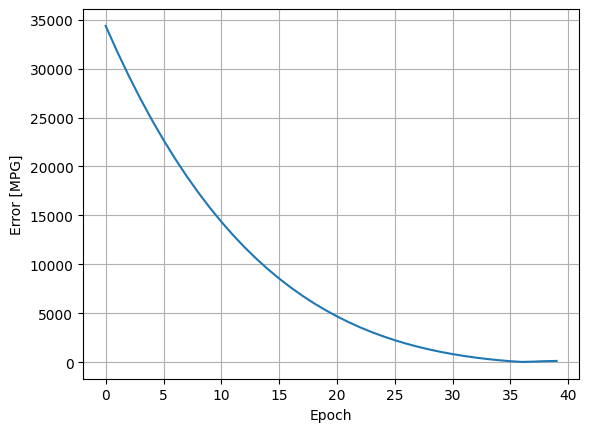

In [ ]:
#Посмотрим на график уменьшения функции потерь. Останавливаться можно было сильно заранее
import matplotlib.pyplot as plt

def plot_loss(history):
  x = np.array(history)[:,0]
  y = np.array(history)[:,1]
  plt.plot(x,y)
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.grid(True)

plot_loss(history)

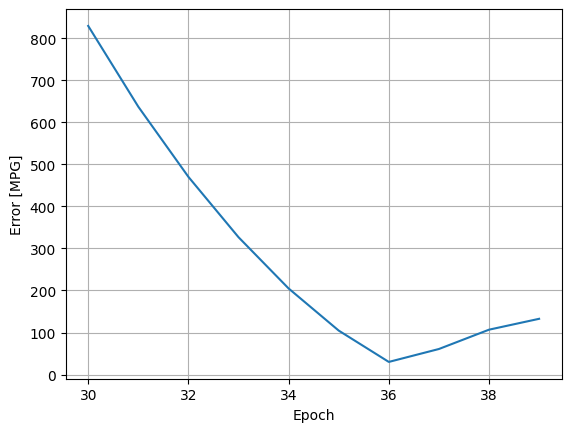

In [ ]:
#Можно увидеть изменение ошибки и более детально.

plot_loss(history[30:])